## 데이터 처리 환경설정

In [1]:
import pandas as pd
import openpyxl
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt 

from sklearn.linear_model import LinearRegression
import datetime as dt
import numpy as np
import cv2

import datetime as dt
import time
import collections

In [2]:
pd.set_option('display.float_format', None)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

### 데이터 불러오기
* 개인정보 유출 때문에 개인 폴더에서 통일화 작업을 하고 불러옴

In [3]:
df_sam1_ori = pd.read_csv('./data/sample1.csv')
df_sam2_ori = pd.read_csv('./data/sample2.csv')

In [4]:
df_sam1 = df_sam1_ori.copy()
df_sam2 = df_sam2_ori.copy()

In [5]:
df_sam1.head()

,PID,AGE,Eye,Exam Date,Exam ID,Pupil diameter,False positive percent,False negative percent,Fixation loss,Fixation trial,Exam duration(min),GHT,MD,MD probability,PSD,PSD probability,VFI,PDP_01,PDP_02,PDP_03,PDP_04,PDP_05,PDP_06,PDP_07,PDP_08,PDP_09,PDP_10,PDP_11,PDP_12,PDP_13,PDP_14,PDP_15,PDP_16,PDP_17,PDP_18,PDP_19,PDP_20,PDP_21,PDP_22,PDP_23,PDP_24,PDP_25,PDP_26,PDP_27,PDP_28,PDP_29,PDP_30,PDP_31,PDP_32,PDP_33,...,TDV_05,TDV_06,TDV_07,TDV_08,TDV_09,TDV_10,TDV_11,TDV_12,TDV_13,TDV_14,TDV_15,TDV_16,TDV_17,TDV_18,TDV_19,TDV_20,TDV_21,TDV_22,TDV_23,TDV_24,TDV_25,TDV_26,TDV_27,TDV_28,TDV_29,TDV_30,TDV_31,TDV_32,TDV_33,TDV_34,TDV_35,TDV_36,TDV_37,TDV_38,TDV_39,TDV_40,TDV_41,TDV_42,TDV_43,TDV_44,TDV_45,TDV_46,TDV_47,TDV_48,TDV_49,TDV_50,TDV_51,TDV_52,TDV_53,TDV_54
0,1,71,OD,2005-03-18 오후 12:57:56,NaN,2.8,5,41,1,14,5,3,-16.11,5,8.77,5,63,4,4,4,4,1,4,4,4,4,4,4,4,4,0,0,1,4,0,0,2,0,0,0,0,0,NaN,3,3,4,0,0,0,0,...,-10,-23,-30,-23,-33,-24,-31,-18,-17,-3,-9,-11,-28,-5,-5,-13,-5,-7,-7,-6,-9,NaN,-14,-13,-18,-10,-10,-7,-6,-15,NaN,-12,-7,-18,-19,-8,-12,-29,-31,-23,-21,-7,-31,-10,-21,-9,-16,-19,-18,-24
1,1,71,OS,2005-03-18 오후 1:08:41,NaN,0.0,5,24,1,13,4,3,-13.60,5,7.03,5,58,4,4,4,4,4,3,0,0,4,1,0,3,4,4,0,4,3,4,2,4,1,2,4,3,4,NaN,4,4,4,4,4,4,4,...,-26,-13,-3,-7,-21,-13,-3,-11,-15,-19,-9,-18,-17,-17,-12,-22,-11,-12,-19,-11,-17,NaN,-15,-14,-15,-15,-23,-13,-24,-32,NaN,-19,-15,-24,-19,-31,-3,-19,-17,-8,-11,-6,-16,-14,-8,-7,-1,-3,-3,-12


In [6]:
df_sam2.head(3)

,PID,AGE,Eye,Exam Date,Exam ID,Pupil diameter,False positive percent,False negative percent,Fixation loss,Fixation trial,Exam duration(min),GHT,MD,MD probability,PSD,PSD probability,VFI,PDP_01,PDP_02,PDP_03,PDP_04,PDP_05,PDP_06,PDP_07,PDP_08,PDP_09,PDP_10,PDP_11,PDP_12,PDP_13,PDP_14,PDP_15,PDP_16,PDP_17,PDP_18,PDP_19,PDP_20,PDP_21,PDP_22,PDP_23,PDP_24,PDP_25,PDP_26,PDP_27,PDP_28,PDP_29,PDP_30,PDP_31,PDP_32,PDP_33,...,TDV_05,TDV_06,TDV_07,TDV_08,TDV_09,TDV_10,TDV_11,TDV_12,TDV_13,TDV_14,TDV_15,TDV_16,TDV_17,TDV_18,TDV_19,TDV_20,TDV_21,TDV_22,TDV_23,TDV_24,TDV_25,TDV_26,TDV_27,TDV_28,TDV_29,TDV_30,TDV_31,TDV_32,TDV_33,TDV_34,TDV_35,TDV_36,TDV_37,TDV_38,TDV_39,TDV_40,TDV_41,TDV_42,TDV_43,TDV_44,TDV_45,TDV_46,TDV_47,TDV_48,TDV_49,TDV_50,TDV_51,TDV_52,TDV_53,TDV_54
0,264,26,OD,2008-11-26 오후 4:38:34,NaN,0.0,1,4,2,19,7,3,-4.46,4,6.73,5,91,0,0,0,0,0,1,4,0,0,1,4,0,0,0,0,0,0,0,0,4,0,0,0,0,0,NaN,4,0,0,0,1,1,0,...,0,-5,-14,0,-3,-4,-27,1,-1,-1,0,0,-3,-2,-4,-20,-4,-5,-5,-3,-2,NaN,-33,-3,-3,-3,-5,-6,-3,-3,NaN,-4,-4,-3,-1,-3,-2,-4,-3,-3,-2,-3,-3,-3,-4,-3,-2,-3,-2,-4
1,264,26,OS,2008-11-04 오후 4:14:53,NaN,0.0,0,0,0,21,8,3,-13.01,5,14.83,5,67,4,4,4,4,4,4,4,4,4,4,4,3,0,4,4,0,4,4,0,4,4,0,0,0,0,NaN,4,0,0,0,4,0,0,...,-33,-34,-21,-31,-33,-35,-28,-27,-11,-29,-23,-3,-33,-33,-1,-12,-32,-4,-2,-4,-6,NaN,-31,-3,-2,-3,-31,-3,-4,-6,NaN,-5,-8,-5,-7,-7,-6,-3,-4,-3,-2,-3,-3,-3,1,-2,-5,-2,-2,-7
2,264,26,OD,2008-11-04 오후 4:05:13,NaN,0.0,1,0,0,19,7,3,-4.42,4,7.31,5,89,0,0,0,0,0,0,4,2,0,0,4,0,0,0,0,0,1,0,0,4,0,0,0,1,0,NaN,4,1,0,1,2,0,1,...,-3,0,-16,-8,-1,0,-14,-3,0,1,0,0,-5,-1,-3,-35,-2,-4,-3,-4,-3,NaN,-33,-4,-2,-4,-6,-5,-4,-6,NaN,-4,-4,-5,-3,-5,-3,-4,-4,-8,-5,-2,-2,-2,-7,-4,-2,-1,-2,-2


* 검진 날짜를 datetime으로 바꿔줌 (정렬을 위해)
    * PID별, 연령별, 검진날짜 별로 정렬

In [7]:
df_sam2['Exam Date'] = pd.to_datetime(df_sam2['Exam Date'].apply(lambda x: x[:10]+' '+str(int(x[-7:-6])+12)+x[-6:] if '오후' in x else x[:10]+' '+x[-8:]))

In [8]:
df_sort2 = df_sam2.sort_values(['PID', 'AGE','Exam Date'], ascending = [True, True, False]).copy()

In [9]:
pid_list = list(df_sort2['PID'].unique())

## 의문 데이터
* 같은 날 같은 눈을 2번 검사한 데이터가 있음
    * 검사결과가 이상할 경우 한번 더 검진한다고 함. 고로 16일 이내에 같은 검사를 했을 경우 최신 데이터만 쓰기로 함

In [10]:
df_sort2.groupby(['PID','AGE','Eye']).count()['Exam Date'].unique()

array([1, 2, 3, 6, 5, 4], dtype=int64)

* 제거할 인덱스를 뽑아내는 과정

In [11]:
# st_time = time.time()
# ft = 0

# err_list = [[] for i in range(3)]
# qna_list = []
# ind_list = []

# for i in pid_list:
#     for j in df_sort2['AGE'].unique():
#         for k in df_sort2['Eye'].unique():
#             df_want = df_sort2[(df_sort2['PID']==i)&(df_sort2['AGE']==j)&(df_sort2['Eye']==k)]
#             date_want = df_want['Exam Date'].apply(lambda x : dt.datetime.toordinal(pd.to_datetime(str(x)[:10])))
#             if len(df_want)>=2 :
#                 for m in range(len(df_want)-1):
#                     qna_list.append(date_want.iloc[m] - date_want.iloc[m+1])
#                     if date_want.iloc[m] - date_want.iloc[m+1] <= 16:
#                         err_list[0].append(i)
#                         err_list[1].append(j)
#                         err_list[2].append(k)
#                         ind_list.append(df_want.index[m+1])

#     ft += 1
#     if ft%10==0 : 
#         ed_time = time.time() - st_time
#         print('\r남은 갯수 :', ft, '/', len(df_sort2['PID'].unique()), '\t\t남은 시간 :', round((ed_time/ft)*(len(df_sort2['PID'].unique())-ft-1), 2)
#              ,'\t\t', end='')

In [12]:
ind_list = [34, 49, 50, 66, 93, 87, 97, 95, 121, 131, 150, 136, 172, 179, 191, 190, 205, 273, 274, 285, 290, 291, 283, 286, 347, 366, 397, 402, 424, 427, 470, 473, 480, 490, 514, 508, 516, 509, 557, 583, 625, 627, 622, 659, 698, 697, 776, 812, 814, 808, 813, 811, 815, 832, 880, 930, 948, 939, 3, 4]

In [13]:
df_sort2.drop(index = ind_list, inplace = True)

* 시계열 예측이기에 데이터가 너무 적으면 의미가 없음, 최소 4번의 검진이 있는 데이터만 사용할 것

In [14]:
want_pid = [[] for i in range(2)]
not_want_ind = []
for i in pid_list:
    for j in df_sort2['Eye'].unique():
        if len(df_sort2[(df_sort2['PID']==i) & (df_sort2['Eye']==j)])<4 :
            for k in df_sort2[(df_sort2['PID']==i) & (df_sort2['Eye']==j)].index:
                not_want_ind.append(k)

In [15]:
df_4 = df_sort2.drop(index = not_want_ind).copy()

In [16]:
# 검사 값들
check_list = ['PDP', 'PDV', 'THV', 'TDP', 'TDV']

## 데이터 이상치 시각화 후 확인
   * THV를 제외한 다른 분야에서는 26, 35번 데이터는 측정이 안되는 것을 확인 - 맹점
   * 특이 데이터는 박사님과 논의
        - PDP, TDP는 P-value에 관한 것이므로 우선 PDV, THV, TDV를 먼저 살펴본다. 그 중에서도 THV를 먼저 살펴본다.
        - THV는 기계에서 환자가 반응한 가장 sensitive한 시표의 밝기
        - TDV는 THV - 일반인들의 평균
            - THV에서 주위의 값들과 다른 추이를 보이는 point 확인해보기
        - PDV는 TDV + Overall sensitivity
           - TDV의 같은 값이라도 시야의 위치에 따라 다를 수 있음, 눈의 중심에 가까울수록 중요


PDP


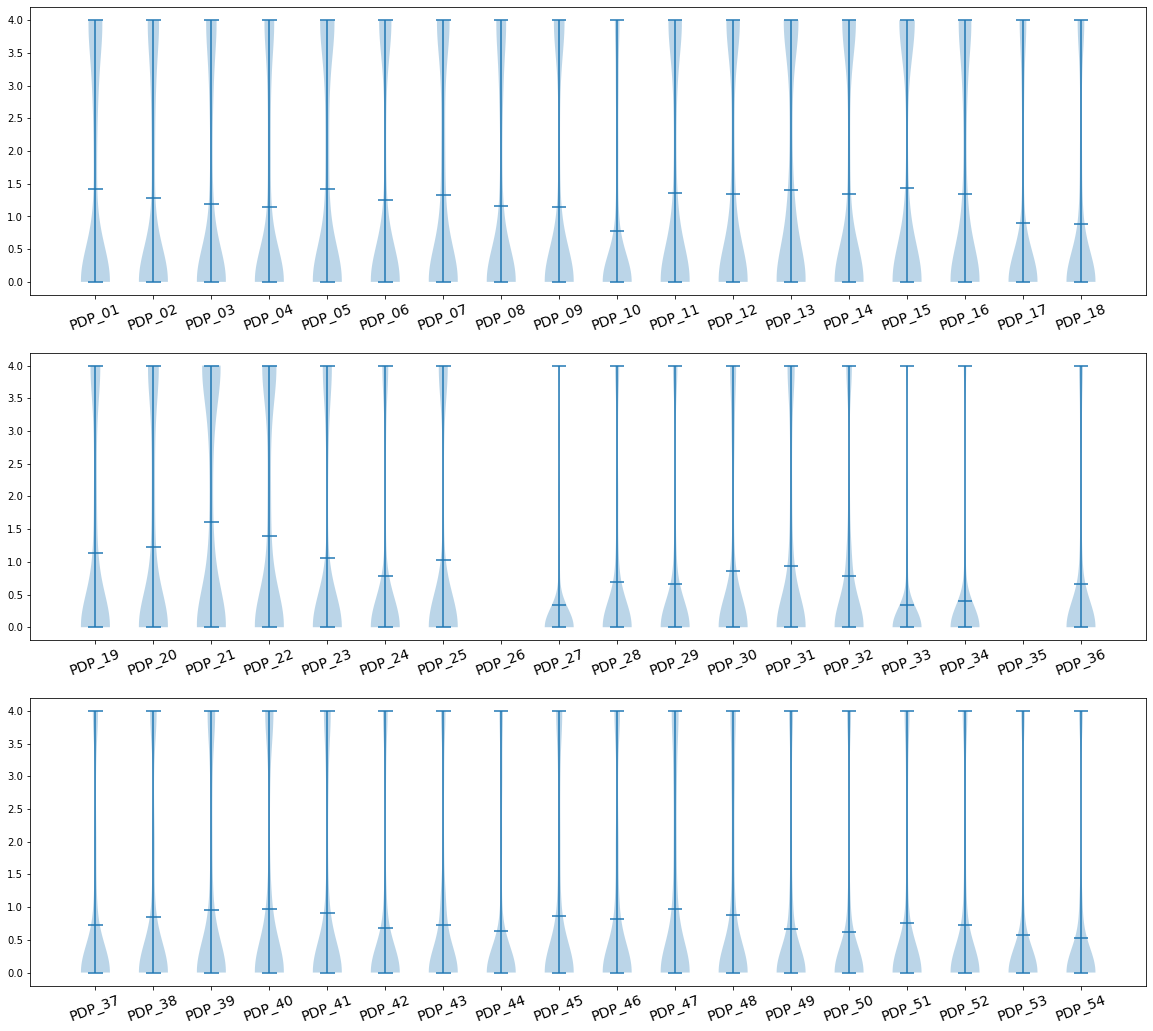


PDV


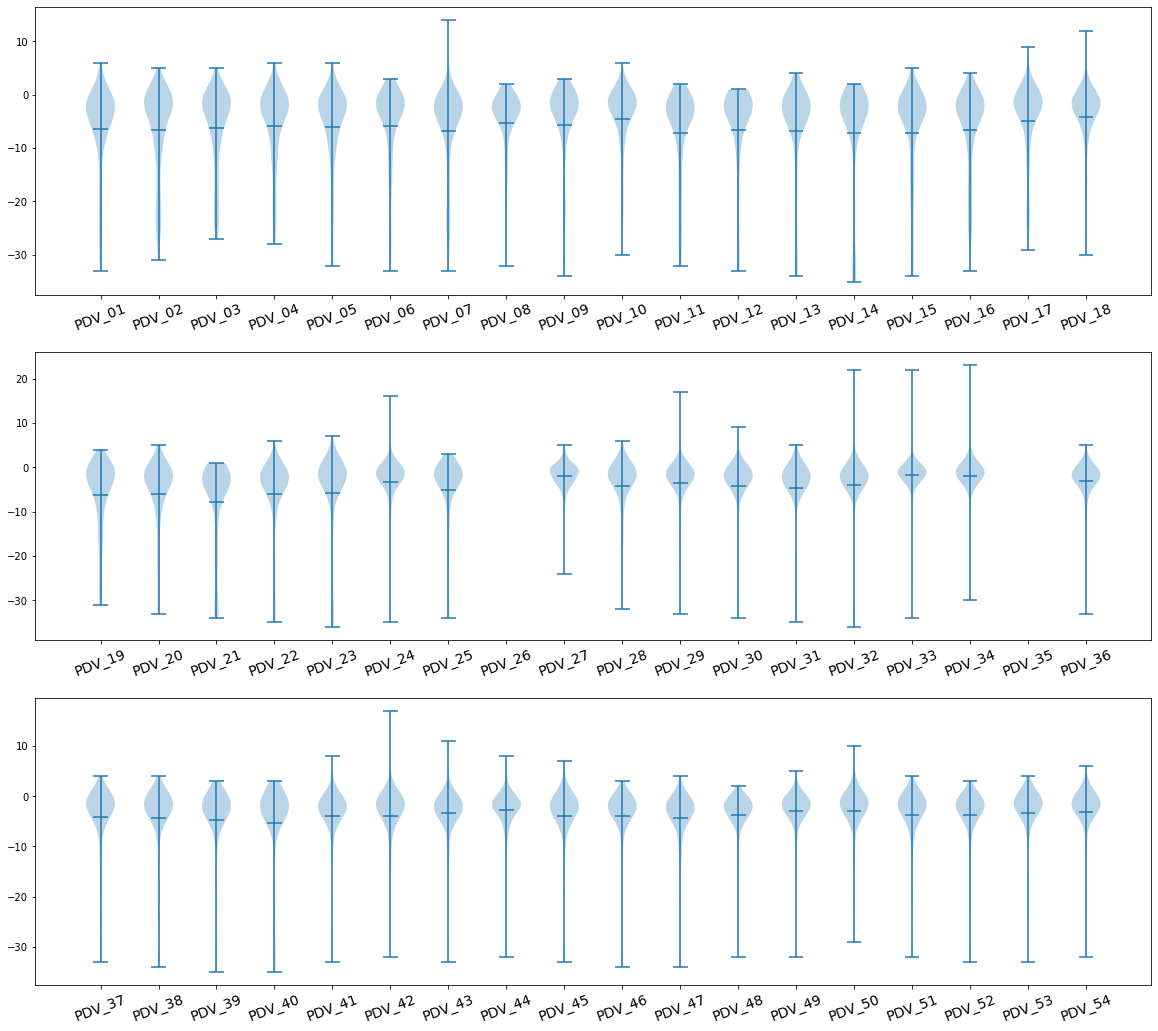


THV


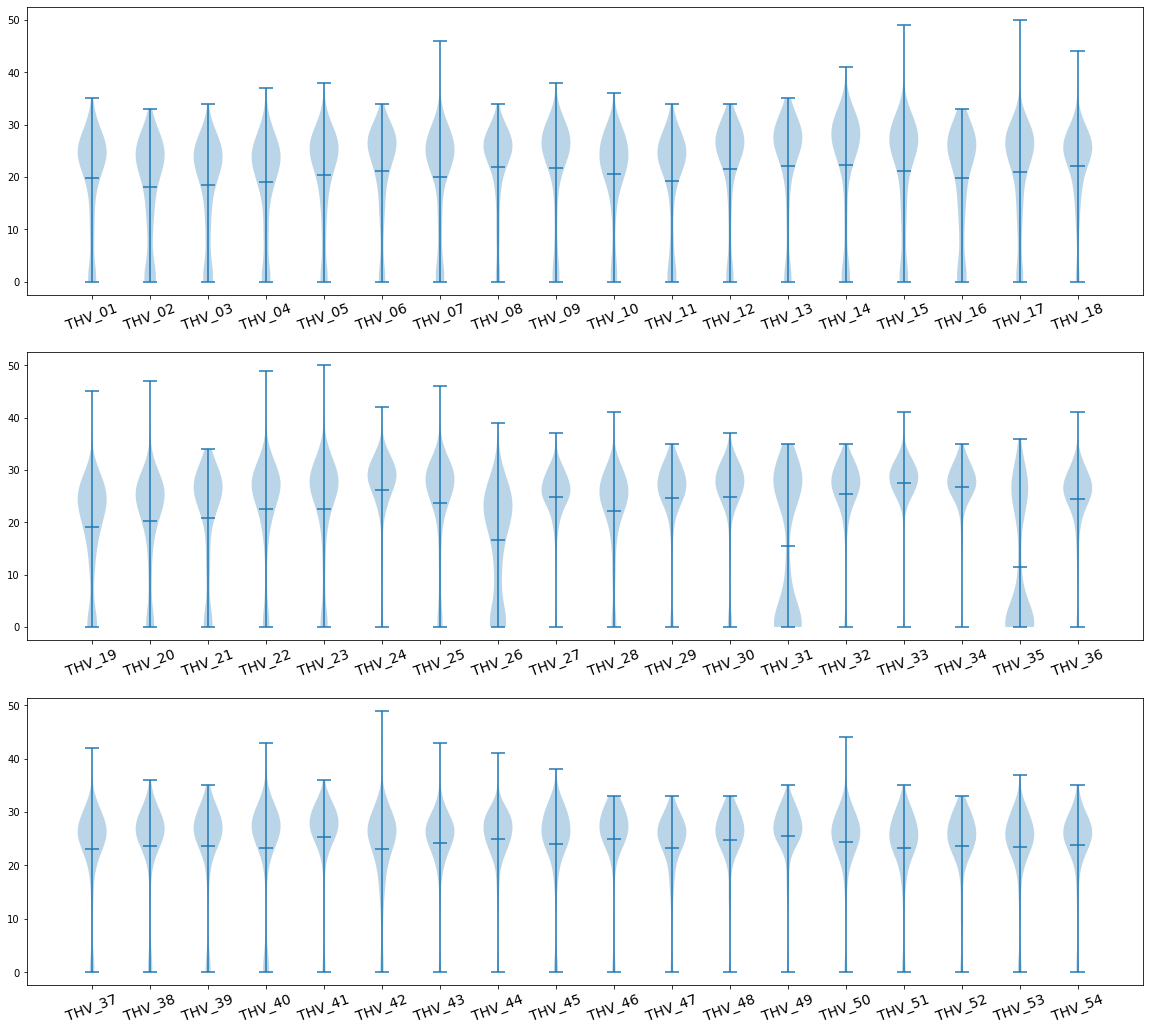


TDP


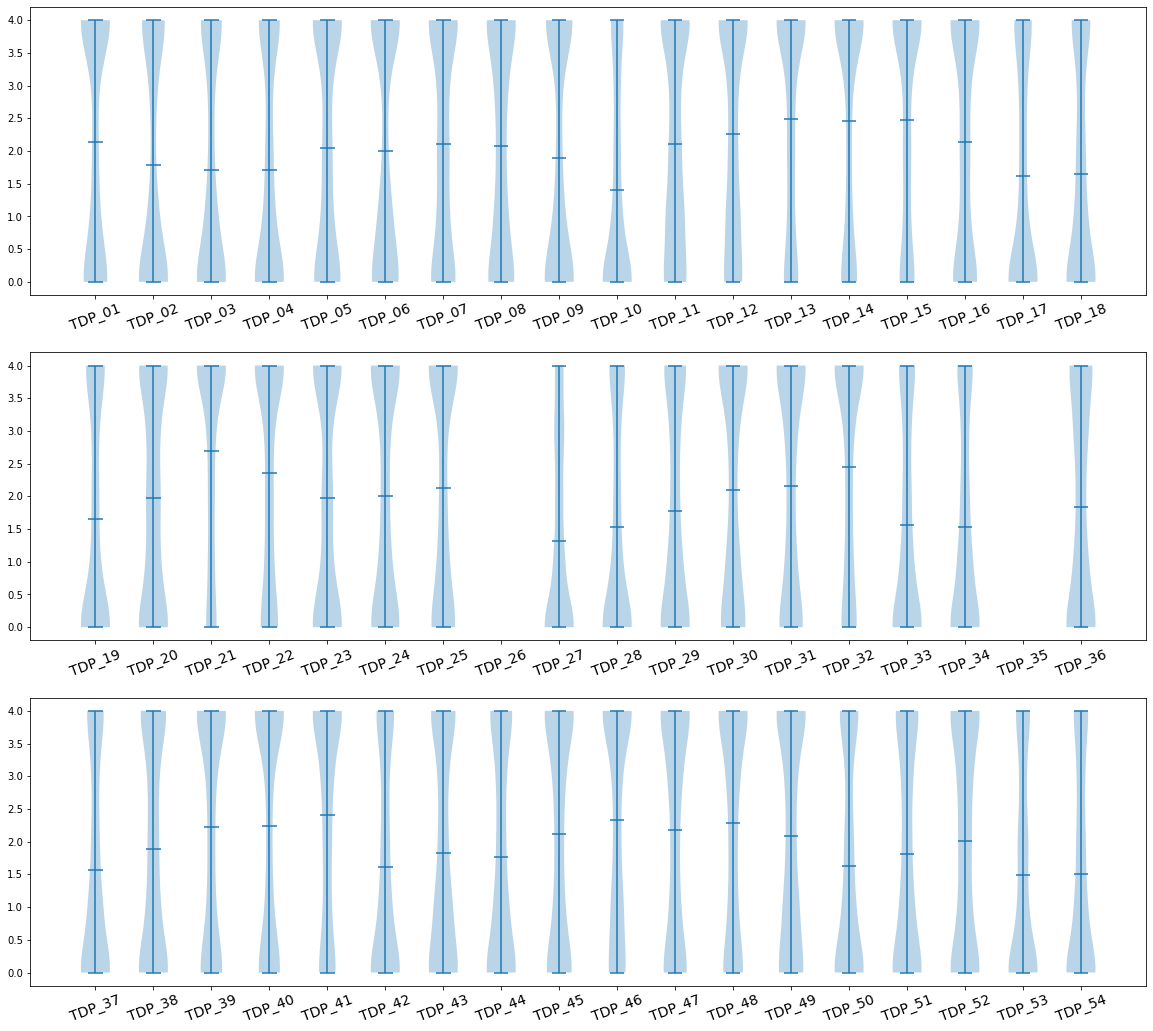


TDV


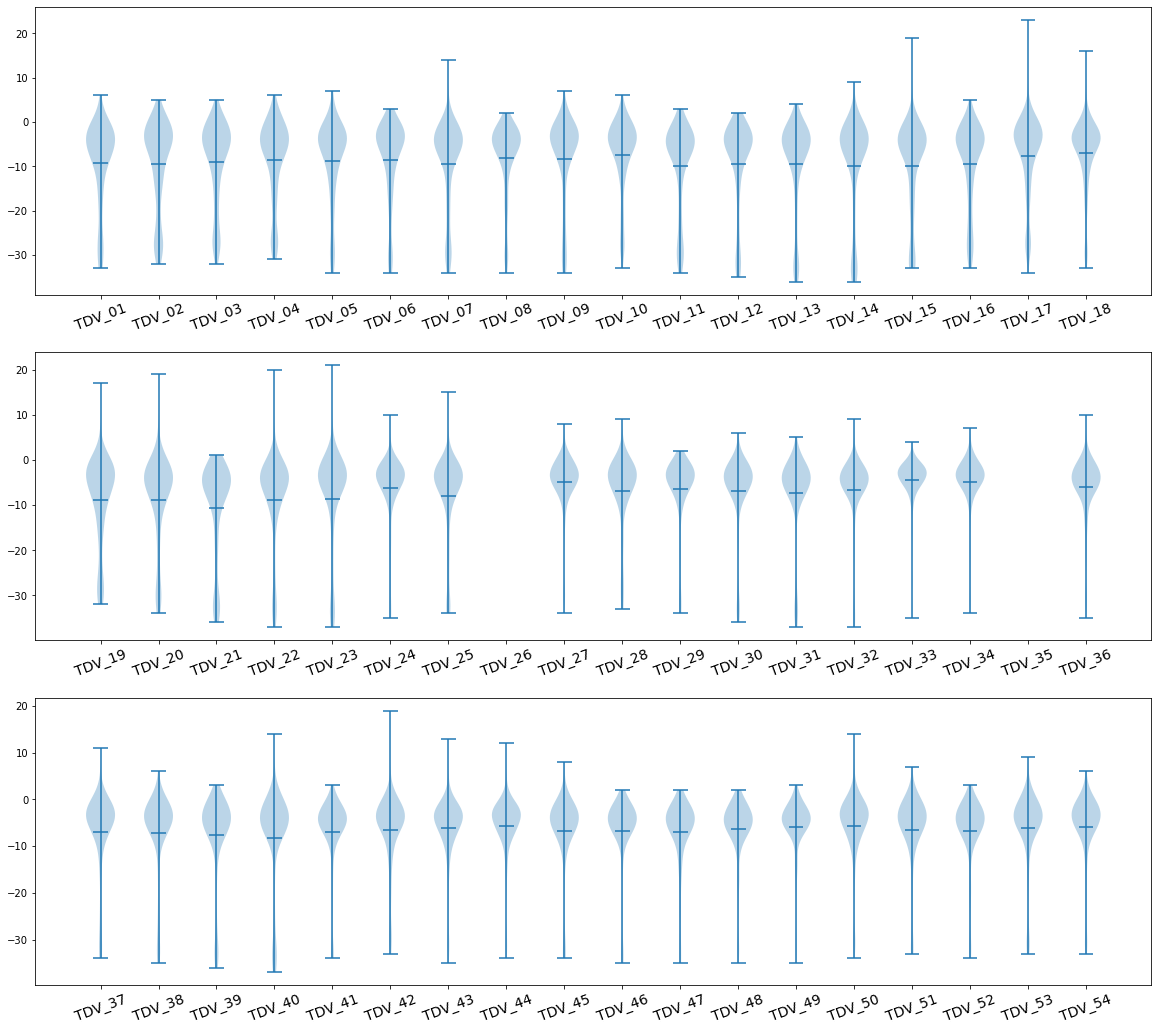

In [17]:
for m in range(len(check_list)):
    print()
    print(check_list[m])
    fig, axs = plt.subplots(3, 1, figsize = (20, 18))
    for k in range(0, 3):
        axs[k].violinplot([df_4.iloc[:, i] for i in range(17+18*k+54*m, 17+18*(k+1)+54*m)], showmeans = True)

        plt.sca(axs[k])
        plt.xticks([i for i in range(1, 19)], [df_4.columns[i] for i in range(17+18*k+54*m, 17+18*(k+1)+54*m)],
                   fontsize = 14, rotation=20)

    plt.show()

### 특이값이 3개 있었던 THV를 우선적으로 살펴봄
* 26, 31, 35번 point가 특이하다
    * 26, 35번은 맹점이므로 검사가 제대로 이루어지지 않음, 따라서 31번을 중심적으로 바라보자

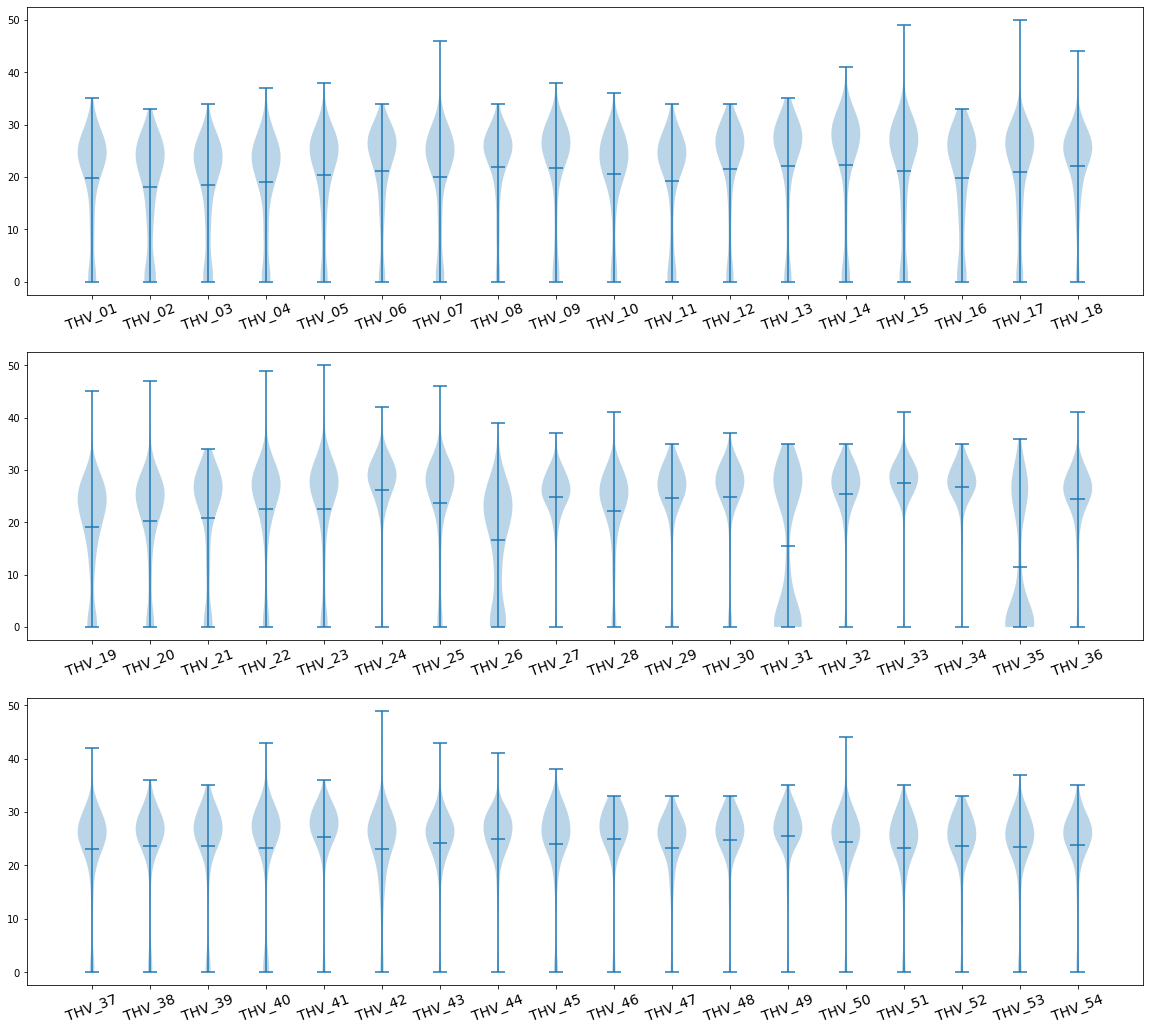

In [18]:
fig, axs = plt.subplots(3, 1, figsize = (20, 18))
for k in range(0, 3):
    axs[k].violinplot([df_4.iloc[:, i] for i in range(17+18*k+108, 17+18*(k+1)+108)], showmeans = True)

    plt.sca(axs[k])
    plt.xticks([i for i in range(1, 19)], [df_4.columns[i] for i in range(17+18*k+108, 17+18*(k+1)+108)],
               fontsize = 14, rotation=20)

plt.show()

In [19]:
see_31 = df_4[['PID','AGE','Eye','THV_21','THV_22','THV_23','THV_30','THV_31','THV_32','THV_38','THV_39','THV_40']]

* 보통 눈의 경우 주위 8개와 비슷한 값을 나타내야한다고 함. 31번 Point 주변 8개 point 시각화
    * 그렇지 않은 형태를 띄는 경우가 꽤 존재한다.
        * 그러한 값들이 더 있는 지, 측정이 제대로 이루어지지 않아서 그런 것인지 확인해보자

2


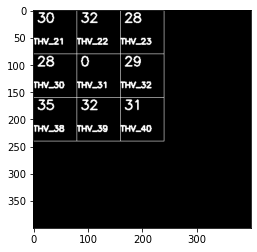

9


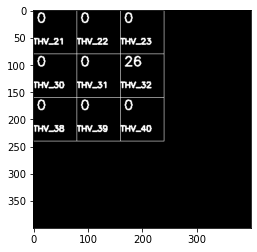

12


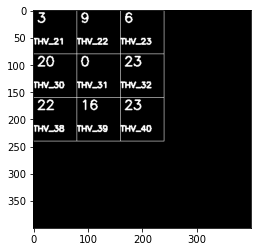

In [20]:
for j in [3, 17, 23]:
    want_see = pd.DataFrame(see_31.iloc[j]).T
    img = np.zeros((400, 400, 3), np.uint8)
    print(pd.DataFrame(see_31.iloc[j]).T.iloc[0,0])
    for i in range(9):
        if i<3:
            n=0
            point1 = 0 + 80 * i, 80*n
            point2 = 80 + 80 * i, 80*(n+1)
            point3 = 7 + 80 * i, 80*n+22
            point4 = 80 * i, 80*n+62
            img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
            img = cv2.putText(img, str(want_see.iloc[0, i+3]), point3, 16, 0.8, (255,255,255),
                                 thickness = 2)
            img = cv2.putText(img, want_see.columns[i+3], point4, 16, 0.5, (255,255,255),
                                 thickness = 2)

        elif 3<=i<6:
            n=1
            point1 = 0 + 80 * (i-3), 80*n
            point2 = 80 + 80 * (i-3), 80*(n+1)
            point3 = 7 + 80 * (i-3), 80*n+22
            point4 = 80 * (i-3), 80*n+62
            img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
            img = cv2.putText(img, str(want_see.iloc[0, i+3]), point3, 16, 0.8, (255,255,255),
                                 thickness = 2)
            img = cv2.putText(img, want_see.columns[i+3], point4, 16, 0.5, (255,255,255),
                                 thickness = 2)

        elif 6<=i:
            n=2
            point1 = 0 + 80 * (i-6), 80*n
            point2 = 80 + 80 * (i-6), 80*(n+1)
            point3 = 7 + 80 * (i-6), 80*n+22
            point4 = 80 * (i-6), 80*n+62
            img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
            img = cv2.putText(img, str(want_see.iloc[0, i+3]), point3, 16, 0.8, (255,255,255),
                                 thickness = 2)

            img = cv2.putText(img, want_see.columns[i+3], point4, 16, 0.5, (255,255,255),
                                 thickness = 2)


    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)            
    plt.imshow(imgRGB)
    plt.show()

    # cv2.imshow(str(want_see.iloc[0, 0]), img)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

## 측정 오류 검증 
![Value Info](./data/value.png)

* 우리는 TDV = THV - 일반인들의 평균임을 알고 있다.
    * 같은 나이대의 일반인들의 평균은 모두 같음
        * 따라서 나이가 같다면 THV - TDV도 같아야할 것
            * 평균에서 5이상 벗어날 경우 데이터가 잘못 측정 되었다고 판단

In [21]:
mean_list = ['mean'+str(i) for i in range(1,55)]

In [22]:
for i in range(len(mean_list)):
    df_4[mean_list[i]] = df_4.iloc[:,17+54*2+i] - df_4.iloc[:,17+54*4+i]

In [23]:
df_4['Exam Year'] = df_4['Exam Date'].apply(lambda x : int(str(x)[:4]))

* 같은 나이대, 눈에 따른 일반인의 평균을 구해봤을 때 역시나 여러 Point들이 **문제가 많음**을 알 수 있음
    * 검사결과의 오류일 가능성이 높다고 판단, 최빈값으로 오류값들을 채워줌

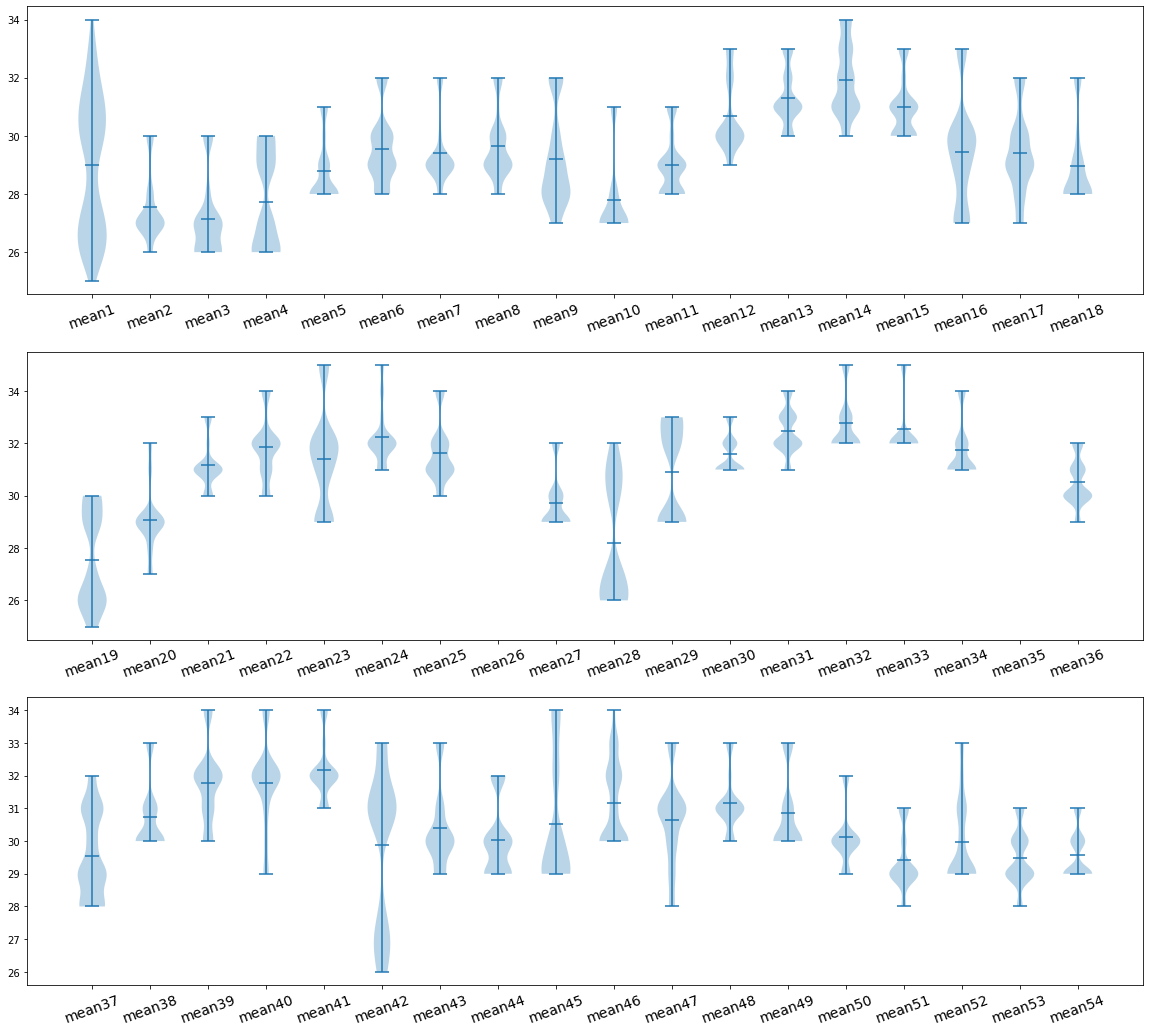

In [154]:
fig, axs = plt.subplots(3, 1, figsize = (20, 18))
for k in range(0, 3):
    axs[k].violinplot([df_4.iloc[:, i] for i in range(17+18*k+270, 17+18*(k+1)+270)], showmeans = True)

    plt.sca(axs[k])
    plt.xticks([i for i in range(1, 19)], [df_4.columns[i] for i in range(17+18*k+270, 17+18*(k+1)+270)],
               fontsize = 14, rotation=20)

plt.show()

In [26]:
# out_list = []
# for i in df_4['AGE'].unique():
#     for j in df_4[(df_4['AGE']==i)]['Eye'].unique():
#         for k in df_4.columns[-54:].drop(['mean26','mean35','Exam Year']):
#             for q in range(len(df_4[(df_4['AGE']==i)&(df_4['Eye']==j)])):
#                     if abs(df_4[(df_4['AGE']==i)&(df_4['Eye']==j)][k].mode()[0] - 
#                      df_4[(df_4['AGE']==i)&(df_4['Eye']==j)][k].iloc[q]) > 5 :
#                         out_list.append(k)

In [29]:
out_list = ['mean31', 'mean31', 'mean16', 'mean31', 'mean31', 'mean34', 'mean34', 'mean31', 'mean31', 'mean31', 'mean31', 'mean23', 'mean31', 'mean31', 'mean31', 'mean31', 'mean31', 'mean31', 'mean23', 'mean31', 'mean31', 'mean16', 'mean31', 'mean31', 'mean31', 'mean42', 'mean31', 'mean32', 'mean28', 'mean31', 'mean31', 'mean31', 'mean31', 'mean32', 'mean32', 'mean32', 'mean33', 'mean34', 'mean31', 'mean31', 'mean31', 'mean31', 'mean23', 'mean23', 'mean28', 'mean28', 'mean31', 'mean31', 'mean42', 'mean42', 'mean28', 'mean31', 'mean31', 'mean42', 'mean42', 'mean31', 'mean31', 'mean16', 'mean23', 'mean31', 'mean42', 'mean31', 'mean31', 'mean32', 'mean32', 'mean34', 'mean31', 'mean31', 'mean31', 'mean34', 'mean31', 'mean31', 'mean31', 'mean12', 'mean13', 'mean13', 'mean13', 'mean13', 'mean13', 'mean15', 'mean15', 'mean23', 'mean28', 'mean31', 'mean31', 'mean31', 'mean31', 'mean33', 'mean33', 'mean10', 'mean12', 'mean12', 'mean13', 'mean13', 'mean28', 'mean28', 'mean31', 'mean33', 'mean34', 'mean31', 'mean32', 'mean31', 'mean34', 'mean31', 'mean33', 'mean31', 'mean32', 'mean33', 'mean31', 'mean31', 'mean42', 'mean28', 'mean31', 'mean31', 'mean32', 'mean32', 'mean13', 'mean31', 'mean32', 'mean28', 'mean31', 'mean31', 'mean31', 'mean31', 'mean32', 'mean32', 'mean33', 'mean42', 'mean42', 'mean31', 'mean31', 'mean31', 'mean31', 'mean31', 'mean31', 'mean31', 'mean31', 'mean31', 'mean32', 'mean32', 'mean33', 'mean33', 'mean34', 'mean31', 'mean31', 'mean31', 'mean31', 'mean28', 'mean28', 'mean31', 'mean31', 'mean31', 'mean31', 'mean31', 'mean31', 'mean31', 'mean31', 'mean31', 'mean31', 'mean31', 'mean31', 'mean31', 'mean31', 'mean31', 'mean23', 'mean31', 'mean31', 'mean31', 'mean32', 'mean33', 'mean34', 'mean23', 'mean31', 'mean31', 'mean31', 'mean31', 'mean31', 'mean31', 'mean31', 'mean31', 'mean34', 'mean31', 'mean31', 'mean32', 'mean32', 'mean23', 'mean28', 'mean31', 'mean31', 'mean31', 'mean32', 'mean33', 'mean33', 'mean31', 'mean31', 'mean31', 'mean31', 'mean31', 'mean31', 'mean23', 'mean31', 'mean31', 'mean31', 'mean23', 'mean31', 'mean31', 'mean31', 'mean31', 'mean31', 'mean32', 'mean31', 'mean31', 'mean31', 'mean31', 'mean31', 'mean31', 'mean31', 'mean33', 'mean34', 'mean32', 'mean33', 'mean34']

In [30]:
collections.Counter(out_list)

Counter({'mean31': 126,
         'mean16': 3,
         'mean34': 12,
         'mean23': 11,
         'mean42': 9,
         'mean32': 21,
         'mean28': 12,
         'mean33': 14,
         'mean12': 3,
         'mean13': 8,
         'mean15': 2,
         'mean10': 1})

In [145]:
try:
    for i in df_4['AGE'].unique():
        for j in df_4[(df_4['AGE']==i)]['Eye'].unique():
            for k in df_4.columns[-54:].drop(['mean26','mean35','Exam Year']):
                if i<30:
                    for p in df_4[(df_4['AGE']<30)&(df_4['Eye']==j)][k].index:
                        df_4[k][p] = df_4[(df_4['AGE']<30)&(df_4['Eye']==j)][k].mode().iloc[-1]
                
                elif 30<=i<40:
                    for p in df_4[(df_4['AGE']>=30)&(df_4['AGE']<40)&(df_4['Eye']==j)][k].index:
                        df_4[k][p] = df_4[(df_4['AGE']>=30)&(df_4['AGE']<40)&(df_4['Eye']==j)][k].mode().iloc[-1]   
                        
                elif 40<=i<50:
                    for p in df_4[(df_4['AGE']>=40)&(df_4['AGE']<50)&(df_4['Eye']==j)][k].index:
                        df_4[k][p] = df_4[(df_4['AGE']>=40)&(df_4['AGE']<50)&(df_4['Eye']==j)][k].mode().iloc[-1]   
                        
                elif 50<=i<60:
                    for p in df_4[(df_4['AGE']>=50)&(df_4['AGE']<60)&(df_4['Eye']==j)][k].index:
                        df_4[k][p] = df_4[(df_4['AGE']>=50)&(df_4['AGE']<60)&(df_4['Eye']==j)][k].mode().iloc[-1]   
                        
                elif 60<=i<70:
                    for p in df_4[(df_4['AGE']>=60)&(df_4['AGE']<70)&(df_4['Eye']==j)][k].index:
                        df_4[k][p] = df_4[(df_4['AGE']>=60)&(df_4['AGE']<70)&(df_4['Eye']==j)][k].mode().iloc[-1]   
                        
                elif 70<=i:
                    for p in df_4[(df_4['AGE']>=70)&(df_4['Eye']==j)][k].index:
                        df_4[k][p] = df_4[(df_4['AGE']>=70)&(df_4['Eye']==j)][k].mode().iloc[-1]   
                    
except : print(i, j, k)

In [149]:
real_THV_list = ['real_THV_'+str(i) for i in range(1,55)]
for i in range(len(real_THV_list)):
    df_4[real_THV_list[i]] = df_4.iloc[:,17+54*5+i] + df_4.iloc[:,17+54*4+i]

* 데이터의 형태들이 일반적인 형태를 띔을 확인할 수 있다

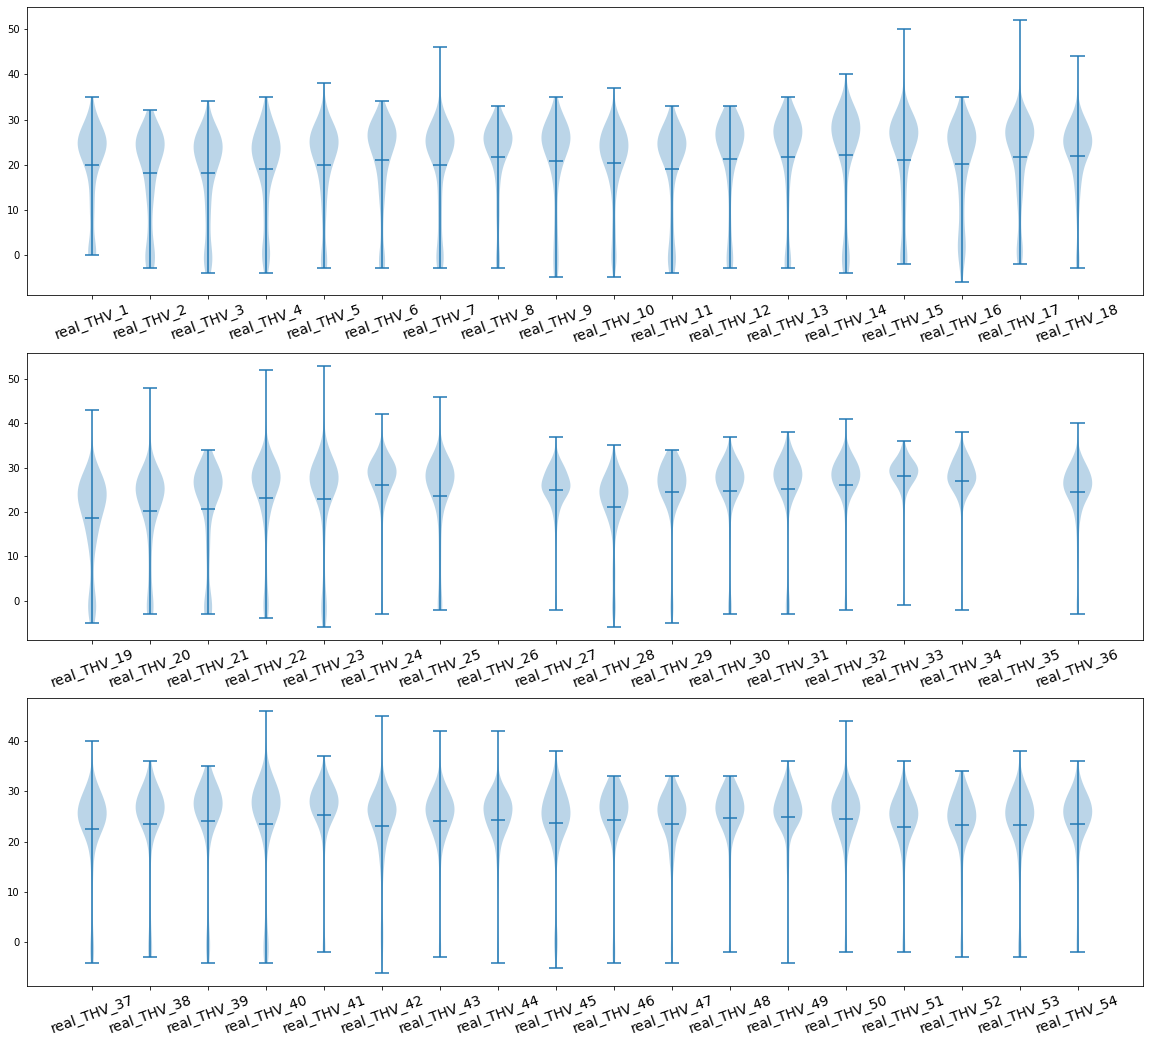

In [156]:
fig, axs = plt.subplots(3, 1, figsize = (20, 18))
for k in range(0, 3):
    axs[k].violinplot([df_4.iloc[:, i] for i in range(17+18*k+325, 17+18*(k+1)+325)], showmeans = True)

    plt.sca(axs[k])
    plt.xticks([i for i in range(1, 19)], [df_4.columns[i] for i in range(17+18*k+325, 17+18*(k+1)+325)],
               fontsize = 14, rotation=20)

plt.show()

In [158]:
df_4.to_csv('./data/want_data.csv', encoding = 'utf-8', index = False)